<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">22.418 · Aprenentatge automàtic</p>
<p style="margin: 0; text-align:right;">Grau en Ciència de Dades Aplicada</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis de Informàtica, Multimèdia i Telecomunicació</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# K-Means clustering

In this notebook we will learn how to find clusters in a given dataset using the K-Means algorithm implementation of the <a href="https://scikit-learn.org/stable/" target="_blank">scikit-learn</a> library. 

The KMeans algorithm clusters data by trying to separate samples in $k$ groups of equal variance, minimizing a criterion known as the **inertia** or **within-cluster sum-of-squares**:

$\sum_{i=0}^{N}\min_{\mu_j \in C}(||x_i - \mu_j||^2)$

where $N$ is the number of input data samples, and $C$ is a set of $k$ disjoint clusters each described by the mean $\mu_j$ of the samples in the cluster.

The algorithm requires the number of clusters ($k$) to be specified, it is an hyperparameter.<details>Hyperparameter is a parameter whose value is used to control the learning process, they must be tuned before the training stage, manually or automatically.</details> 

K-means scales well to large number of samples and has been used across a large range of application areas in many different fields. The term k-means was first introduced in <i>Lloyd, Stuart P. "Least squares quantization in PCM." Information Theory, IEEE Transactions on 28.2 (1982): 129-137.</i>


**Note**: If you are running this in [a colab notebook](https://colab.research.google.com/github/skorch-dev/skorch/blob/master/notebooks/MNIST.ipynb), you should install the dependencies by running the following cell:

In [1]:
# ! pip install scikit-learn matplotlib

First we load the Iris dataset.

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

In order to simulate a clustering task using unsupervised learning, we discard the class information (Iris plant type) of each data sample, so that our samples consist only of numerical features. Also, in order to be able to view the data in two dimensions, we will use only two attributes: sepal width and sepal length. The following figure shows our data set in this two-dimensional space.

Text(0, 0.5, 'sepal width (cm)')

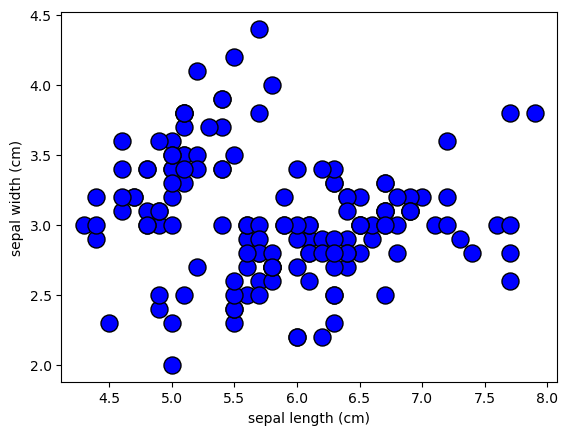

In [3]:
X = iris.data[:, :2]

from matplotlib import pylab as plt
plt.scatter(X[:,0], X[:,1], c='b', edgecolor='k', s=150)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

Now we create an instance of the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html"><code>sklearn.cluster.KMeans</code></a> class, indicating the desired number of clusters with <code>n_clusters=3</code>, and fit the model to our data with the <code>fit()</code> method. 

In [4]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3)
km.fit(X)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


The following figure shows in different colors the three real classes of the Iris dataset and compares them with the three clusters that our model has learned (prediction). As you can see, the k-means algorithm has found a data partition that fits well enough with the original plant types. Remember that the algorithm has not used class information at any time (**Unsupervised learning**).

Text(0.5, 1.0, 'K-means predicted clusters')

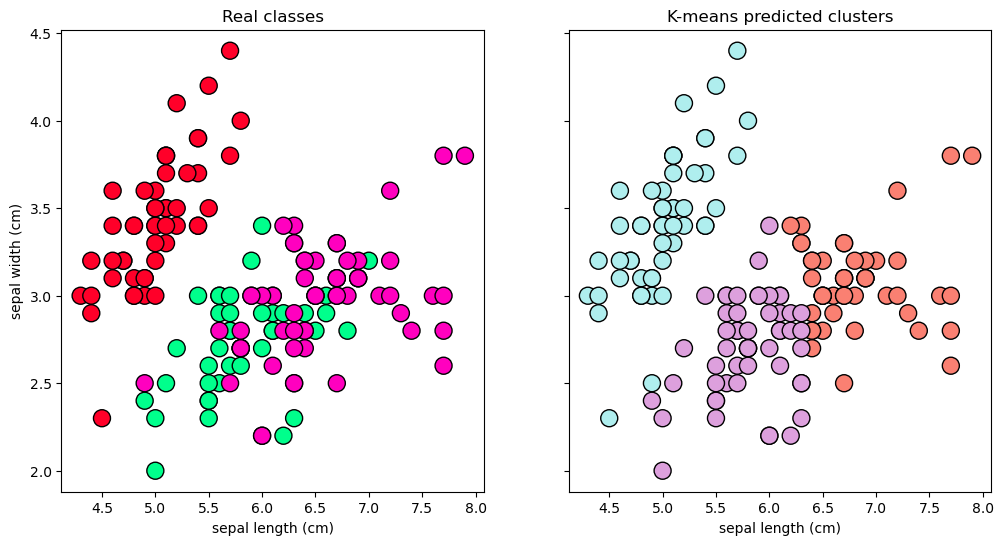

In [5]:
#this will tell us to which cluster does the data observations belong.
new_labels = km.labels_

# plot the real classes (y)
y = iris.target
fig, axes = plt.subplots(1, 2, figsize=(12,6), sharey=True)
axes[0].scatter(X[:, 0], X[:, 1], c=y, cmap='gist_rainbow',edgecolor='k', s=150)
axes[0].set_xlabel(iris.feature_names[0])
axes[0].set_ylabel(iris.feature_names[1])
axes[0].set_title('Real classes')

# plot the K-means predicted clusters
colors=['paleturquoise', 'salmon', 'plum']
axes[1].scatter(X[:, 0], X[:, 1], c=[colors[l] for l in new_labels], edgecolor='k', s=150)
axes[1].set_xlabel(iris.feature_names[0])
axes[1].set_title('K-means predicted clusters')

### K-Means with PCA

The **inertia** or **within-cluster sum-of-squares** is not a normalized metric. Intuitively it measures how internally coherent clusters are, so we know that lower values are better and zero is optimal. But in very high-dimensional spaces, Euclidean distances tend to become inflated (this is an instance of the so-called **"curse of dimensionality"**). 

Running a dimensionality reduction algorithm such as Principal component analysis (PCA) prior to k-means clustering can alleviate this problem and speed up the computations.

**EXERCISE:** Perform PCA in the Iris dataset and then run again the K-means algorithm but in the PCA projected data. Use two principal components for PCA, so you can visualize the clusters in 2D.